In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [47]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect,func

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()
#engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [36]:
# chacke for Columns names
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [37]:
# chacke for Columns names
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [38]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [39]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [40]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [54]:
# Find the most recent date in the data set.
#sel=[measurement.]
recent_date = session.query(func.max(measurement.date)).all()[0][0]
recent_date

first_date = session.query(func.min(measurement.date)).all()[0][0]
#first_date
recent_date

'2017-08-23'

In [55]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
start_datest= datetime.strptime(recent_date, '%Y-%m-%d')
start_datest
start_date= start_datest - relativedelta(months =12)
start_date

datetime.datetime(2016, 8, 23, 0, 0)

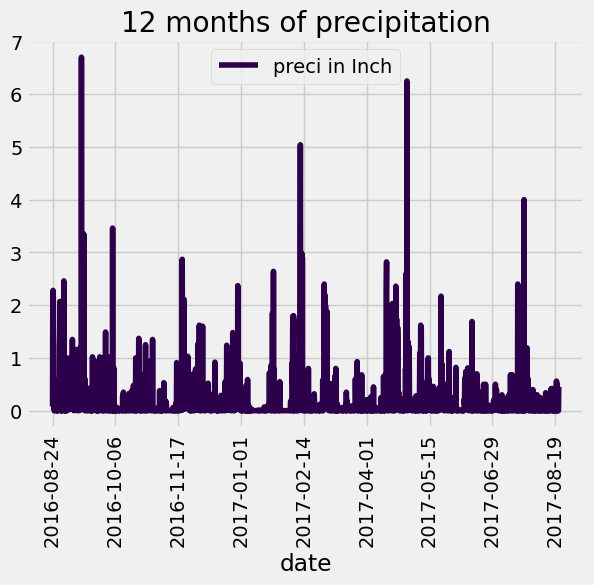

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Perform a query to retrieve the data and precipitation scores
result = session.query(measurement.date, measurement.prcp).filter(measurement.date>=start_date).all()

result
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(result, columns =["date", "preci in Inch"]).sort_values("date",ascending=True).dropna()
df.set_index(df["date"], inplace = True)
df
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, colormap = 'PuOr_r', title='12 months of precipitation')
plt.show()


In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,preci in Inch
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [75]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).distinct().count()

9

In [83]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
results_Stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
results_Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [97]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_min= session.query(func.min(measurement.tobs)).filter(measurement.station == "USC00519281").all()[0][0]
active_max= session.query(func.max(measurement.tobs)).filter(measurement.station == "USC00519281").all()[0][0]
active_avg= session.query(func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()[0][0]

print (f"Min Precipitation for Station USC00519281 is: " + str(active_min) +" Max P: " +str(active_max)+ " Avg P: "+ str(active_avg))

Min Precipitation for Station USC00519281 is: 54.0 Max P: 85.0 Avg P: 71.66378066378067


In [98]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result2 = session.query(measurement.date, measurement.prcp).filter(measurement.date>=start_date,measurement.station == "USC00519281").all()

result2

[('2016-08-24', 2.15),
 ('2016-08-25', 0.06),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.6),
 ('2016-08-29', 0.35),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.24),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.01),
 ('2016-09-03', 0.12),
 ('2016-09-04', 0.14),
 ('2016-09-05', 0.03),
 ('2016-09-06', 0.11),
 ('2016-09-07', 0.16),
 ('2016-09-08', 0.07),
 ('2016-09-09', 0.16),
 ('2016-09-10', 0.09),
 ('2016-09-11', 0.3),
 ('2016-09-12', 0.31),
 ('2016-09-13', 0.34),
 ('2016-09-14', 2.33),
 ('2016-09-15', 0.83),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.07),
 ('2016-09-19', 0.01),
 ('2016-09-20', 0.22),
 ('2016-09-21', 0.07),
 ('2016-09-22', 0.34),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.01),
 ('2016-09-25', 0.03),
 ('2016-09-26', 0.17),
 ('2016-09-27', 0.17),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.59),
 ('2016-09-30', 0.25),
 ('2016-10-01', 0.14),
 ('2016-10-02', 0.06),
 ('2016-10-03', 0.16),
 ('2016-10-04', 0.03),
 ('2016-10-05', 0.01),
 ('2016-10-06',

<AxesSubplot:ylabel='Frequency'>

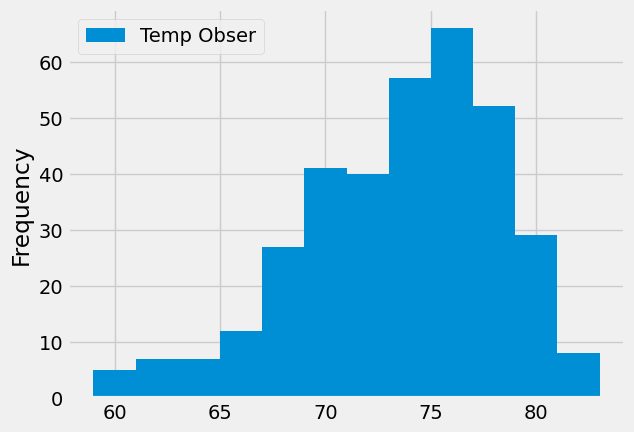

In [103]:
result3 = session.query(measurement.date, measurement.tobs).filter(measurement.date>=start_date,measurement.station == "USC00519281").all()
result3
df2 = pd.DataFrame(result3, columns =["date", "Temp Obser"]).sort_values("date",ascending=True).dropna()
#df2.set_index(df["date"], inplace = True)
df2

df2.plot.hist(bins = 12)
# Use Pandas Plotting with Matplotlib to plot the data
# df.plot(rot=90, colormap = 'PuOr_r', title='12 months of precipitation')
# plt.show()

# Close session

In [ ]:
# Close Session
session.close()